In [18]:
# module import
import sklearn
assert sklearn.__version__

import numpy as np
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

np.random.seed(42)

In [19]:
# MNIST Dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1, as_frame = False)
mnist.keys()

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [20]:
# 존재하는 key 중 data를 학습데이터로 target을 시험 데이터로 지정 예정
X, y = mnist['data'], mnist['target']
X.shape

(70000, 784)

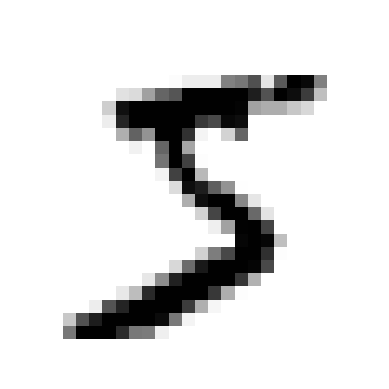

In [21]:
# 0번째 data 출력
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary)

plt.axis('off')
plt.show()

In [22]:
# 형변환
y = y.astype(np.uint8)

In [23]:
# data split
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [24]:
from sklearn.linear_model import SGDClassifier
# tol = early stopping을 위한 매개변수
# max_iter = epoch

sgd_clf = SGDClassifier(max_iter = 1000, tol = 1e-3, random_state=42) #max_iter = 100으로 하니까 오류 나더라
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [25]:
# predice하기 #some_digit = X[0]
sgd_clf.predict([some_digit])

array([ True])

In [26]:
#정확도 출력
from sklearn.model_selection import cross_val_score

# 3개로 나누고 각각에 대한 정확도 
cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [ ]:
#데이터 불균형 해소
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle = True, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
  # model 전체 복사 수행
  clone_clf = clone(sgd_clf)
  X_train_folds = X_train[train_index]
  y_train_folds = y_train[train_index]
  X_test_fold = X_train[test_index]
  y_test_fold = y_train_5[test_index]

  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct / len(y_pred))


0.1005
0.10405
0.0993


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

# 오차행렬
# y_train_5 = 실제 데이터
# y_train_pred = 예측값
# 우리가 알고 있는 TP, TN, FP, FN를 행렬(표)로 구성하여 나타내겠다는 것
confusion_matrix(y_train_5, y_train_pred)

In [ ]:
y_train_perfect_predictions = y_train_5

#정답과 정답을 비교해본다.
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [ ]:
# precision, recall

from sklearn.metrics import precision_score, recall_score

# 메서드에 넣거나 행렬로 구하거나
precision_score(y_train_5, y_train_pred)
cm = confusion_matrix(y_train_5, y_train_pred)
cm[1, 1] / (cm[0, 1] + cm[1, 1])

recall_score = (y_train_5, y_train_pred)
cm[1, 1] / (cm[1, 0] + cm[1, 1])

In [ ]:
# f1 score 구하기
from sklearn.metrics import f1_score

f1_score(y_train, y_train_pred)
cm[1, 1] / (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2)

In [ ]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

In [ ]:
# threshold 값에 따른 판단의 변화
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3, method = 'decision_function')

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [ ]:
# 그래프 그리기
def plot_precision_recall_curve